In [1]:
import pandas as pd
import torch
from LSTMPredict import LSTMPredict
from modules import LSTM_Model,LSTM_Attention_Model,GRU_LSTM_Model
import pickle
device = "cuda" if torch.cuda.is_available() else "cpu"
import matplotlib.pyplot as plt
import os

In [4]:
symbol = "ACB"

In [5]:
csv_file_path = f'D:\KLTN\RLServer\DataTrainLSTM\{symbol}.csv'

# Read the CSV file using pandas
data = pd.read_csv(csv_file_path)

In [6]:
model = LSTM_Attention_Model(input_size = 20,output_size = 1)
model.to(device)
model.load_state_dict(torch.load(f"checkpoint/{symbol}_forecastAttention_model.pt", map_location=torch.device('cpu')))
x_scaler = pickle.load(open(f"checkpoint/{symbol}_LSTMAttention_xscaler.pkl", 'rb'))
y_scaler = pickle.load(open(f"checkpoint/{symbol}_LSTMAttention_yscaler.pkl", 'rb'))
result = LSTMPredict(data,x_scaler,y_scaler,model)

c:\Users\hotua\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\KLTN\RLServer\LSTMPredict.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_row['Date']= update_row['Date'] + timedelta(days=1)
d:\KLTN\RLServer\LSTMPredict.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

1326 Date        2024-05-31 00:00:00
Close                   24650.0
Open                    25000.0
High                    25300.0
Low                     24650.0
forecast                    NaN
signal                      NaN
Name: 1326, dtype: object
1327 {'Date': Timestamp('2024-06-01 00:00:00'), 'forecast': 24889.178}


d:\KLTN\RLServer\LSTMPredict.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_feedback.loc[current_index] = new_row


1328 {'Date': Timestamp('2024-06-02 00:00:00'), 'forecast': 24840.87}
1329 {'Date': Timestamp('2024-06-03 00:00:00'), 'forecast': 24575.148}
1330 {'Date': Timestamp('2024-06-04 00:00:00'), 'forecast': 24099.623}
1331 {'Date': Timestamp('2024-06-05 00:00:00'), 'forecast': 23797.887}
1332 {'Date': Timestamp('2024-06-06 00:00:00'), 'forecast': 23650.752}
1333 {'Date': Timestamp('2024-06-07 00:00:00'), 'forecast': 23547.035}
1334 {'Date': Timestamp('2024-06-08 00:00:00'), 'forecast': 23404.889}
1335 {'Date': Timestamp('2024-06-09 00:00:00'), 'forecast': 23073.115}
1336 {'Date': Timestamp('2024-06-10 00:00:00'), 'forecast': 22647.867}
1337 {'Date': Timestamp('2024-06-11 00:00:00'), 'forecast': 22231.264}
1338 {'Date': Timestamp('2024-06-12 00:00:00'), 'forecast': 21894.703}
1339 {'Date': Timestamp('2024-06-13 00:00:00'), 'forecast': 21665.469}
1340 {'Date': Timestamp('2024-06-14 00:00:00'), 'forecast': 21464.758}
1341 {'Date': Timestamp('2024-06-15 00:00:00'), 'forecast': 21214.545}
1342 {'

In [10]:
result['Close'] = result['Close'].fillna(result['forecast'])

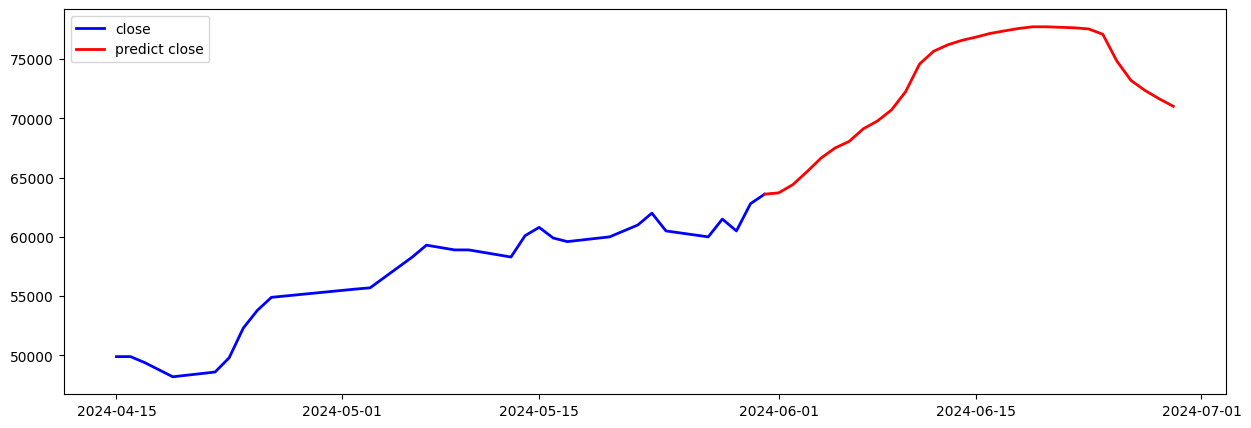

In [11]:
fig = plt.figure(figsize = (15, 5))
# Vẽ 60 ngày cuối cùng
plt.plot(result['Date'].iloc[-60:-29], result['Close'].iloc[-60:-29], color='blue', lw=2, label='close')

# Vẽ 30 ngày cuối cùng với màu khác
plt.plot(result['Date'].iloc[-30:], result['Close'].iloc[-30:], color='red', lw=2, label='predict close')
plt.legend()
plt.show()

In [64]:
result = result.drop(columns=['forecast', 'signal'], errors='ignore')
output_directory = "LSTMCSV"
output_file_path = os.path.join(output_directory, f'{symbol}predictions.csv')
result.to_csv(output_file_path, index=False)